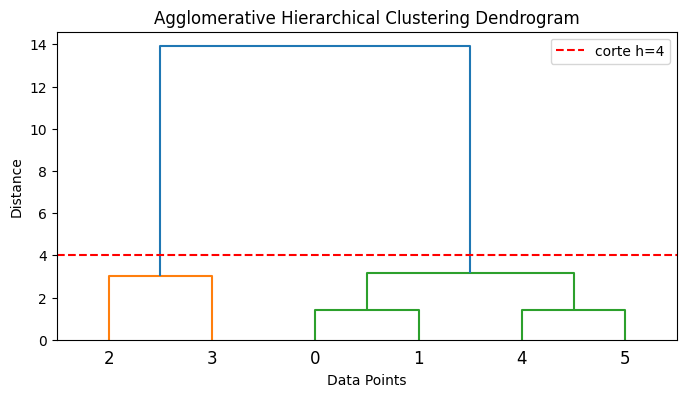

Cluster assignments: [2 2 1 1 2 2]


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.ticker as mticker

#Samples data
data = np.array([[1, 2], [2,3], [5, 8], [8, 8], [1, 0], [0, 1]])

# Applies 
Z = linkage(data, method='ward')

# Plots dendrogram

plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

h = 4
plt.axhline(y=h, color='r', linestyle='--', label=f'corte h={h}')
plt.legend()         # Tamaño de fuente
plt.show()

clusters = fcluster(Z, t=2, criterion='maxclust')
print("Cluster assignments:", clusters)

#pasas los cluster a una nueva columna

In [11]:

df = pd.DataFrame(data, columns=['Features1', 'Features2'])
df['cluster'] = clusters
df

,Features1,Features2,cluster
0,1,2,2
1,2,3,2
2,5,8,1
3,8,8,1
4,1,0,2
5,0,1,2


In [13]:
df.loc[df['cluster'] == 2].mean()

Features1    1.0
Features2    1.5
cluster      2.0
dtype: float64

In [17]:
df.groupby('cluster').mean()

,Features1,Features2
cluster,,
1,6.5,8.0
2,1.0,1.5


In [24]:
df[:1].values[0]

array([1, 2, 2])

In [26]:
group = df.groupby('cluster').mean().T
group

cluster,1,2
Features1,6.5,1.0
Features2,8.0,1.5


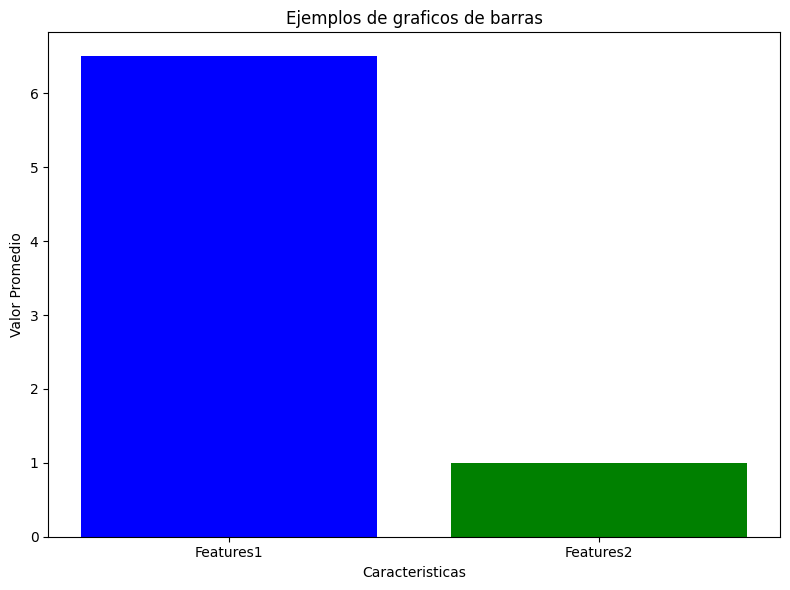

In [28]:
categorias = group.index
valores = group.values[0] # cluster 1
colores = ['blue', 'green']

plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=colores)

#añadir titulo y etiquetas
plt.title('Ejemplos de graficos de barras')
plt.xlabel('Caracteristicas')
plt.ylabel('Valor Promedio')

plt.tight_layout()

plt.show()

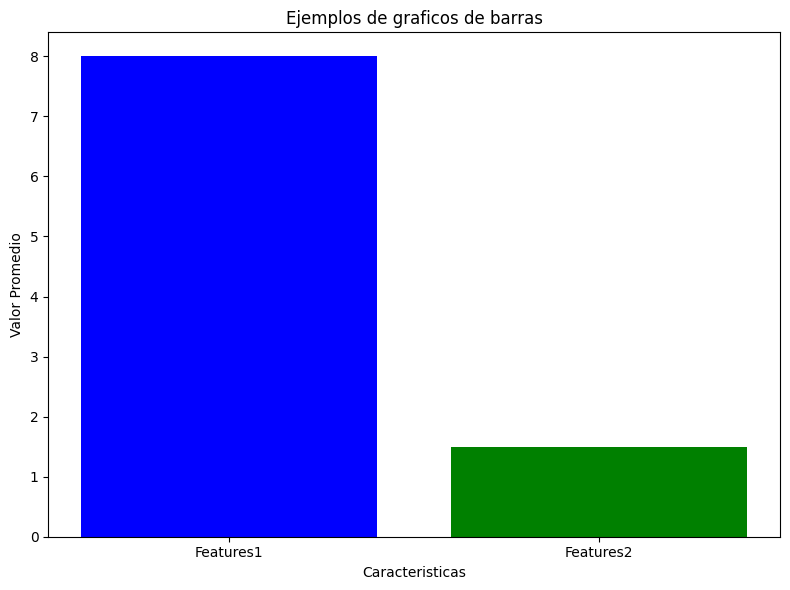

In [ ]:
categorias = group.index
valores = group.values[1] # cluster 2
colores = ['blue', 'green']

plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=colores)

#añadir titulo y etiquetas
plt.title('Ejemplos de graficos de barras')
plt.xlabel('Caracteristicas')
plt.ylabel('Valor Promedio')

plt.tight_layout()

plt.show()

#como identificar como sacar las personas que le gusta tal cluster